<a href="https://colab.research.google.com/github/sharon-nasimiyu/Automation-and-Prediction-of-data/blob/main/malware_detection_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [ ]:
# Load the dataset
data = pd.read_excel("/content/malware detection.xlsx", header=None)

data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,name,ncmds,sizeofcmds,noloadcmd,rebase_size,bind_size,lazy_bind_size,export_size,nsyms,strsize,LoadDYLIB,DYLIBnames,Segments,SectionsTEXT,SectionsData,class
1,2ecb13eef73900d1a22e56681807640a9bdaa2d0097176...,24,3540,19,0,1664,2400,388,179,4776,9,"SystemConfiguration, libz, Cocoa, Foundation, ...",5,8,8,1


In [ ]:
#Cleaning the data
new_df = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_df #set the header row as the df header
data.head(2)

,name,ncmds,sizeofcmds,noloadcmd,rebase_size,bind_size,lazy_bind_size,export_size,nsyms,strsize,LoadDYLIB,DYLIBnames,Segments,SectionsTEXT,SectionsData,class
1,2ecb13eef73900d1a22e56681807640a9bdaa2d0097176...,24,3540,19,0,1664,2400,388,179,4776,9,"SystemConfiguration, libz, Cocoa, Foundation, ...",5,8,8,1
2,2f0c4b83993e056e19503bf33b8fb3a6d14716dedb5390...,43,4644,39,40676,19320,18680,36828,1097,25236,25,"libxml2, CFNetwork, CoreGraphics, Foundation, ...",4,10,20,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Convert non-numeric columns to strings
for col in data.columns:
    if data[col].dtype != 'float64' and data[col].dtype != 'int64':
        data[col] = data[col].astype(str)

# Encode the data
encoder = LabelEncoder()
encoded_data = data.apply(encoder.fit_transform)

In [ ]:
# Convert non-numeric columns to strings
for col in data.columns:
    if data[col].dtype != 'float64' and data[col].dtype != 'int64':
        data[col] = data[col].astype(str)

# Encode the data
for col in data.columns:
    if data[col].dtype == 'object':
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

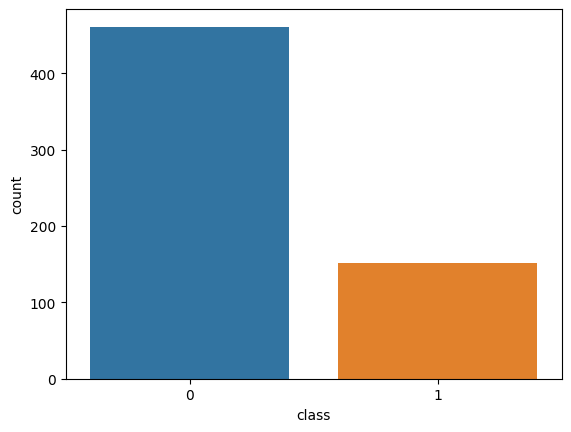

In [ ]:
# Check the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="class", data=data)
plt.show()



In [ ]:
# Encode the name column using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['name'] = le.fit_transform(data['name'])


In [ ]:
# Extract features and labels
features = data.drop(['name', 'class'], axis=1)
labels = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)



In [ ]:
data.dtypes

0
name              int64
ncmds             int64
sizeofcmds        int64
noloadcmd         int64
rebase_size       int64
bind_size         int64
lazy_bind_size    int64
export_size       int64
nsyms             int64
strsize           int64
LoadDYLIB         int64
DYLIBnames        int64
Segments          int64
SectionsTEXT      int64
SectionsData      int64
class             int64
dtype: object

In [ ]:
# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the performance of the model on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)



Accuracy: 0.8617886178861789
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        92
           1       0.73      0.71      0.72        31

    accuracy                           0.86       123
   macro avg       0.82      0.81      0.81       123
weighted avg       0.86      0.86      0.86       123

